In [1]:
%load_ext autoreload
%autoreload 2

In [8]:
import numpy as np
import matplotlib.pyplot as plt

import sys
sys.path.append('../new_modules')
import ObsModels

import ChemotaxisModels as chem

import FSC as controller

In [9]:
import torch
import copy

In [173]:
res = chem.gradx_ecoli3D(NRep = 50, NSteps = 5000)

c0 = 400.0
tau_sub = 25

trajectories = []
for i, curr_res in enumerate(res):

    dict_traj = {}
    dict_traj["actions"] = curr_res["actions"].astype(int)[::tau_sub]
    dict_traj["features"] = np.array([np.ones(curr_res["concentrations"].size).astype(np.float32)[::tau_sub],
                                      curr_res["concentrations"].astype(np.float32)[::tau_sub]/c0])

    trajectories.append(dict_traj)

In [175]:
trajectories[0]["actions"].size

201

In [176]:
F = 2
M = 2
A = 2

seed = 0

FSC_tofit = controller.FSC("continuous", M = M, A = A, F = F, seed = seed)

In [177]:
NEpochs = 10
NBatch = 10
lr = (0.05, 0.05)
gamma = 0.99
train_split = 0.9

In [178]:
tloss, vloss = FSC_tofit.fit(trajectories, NEpochs = NEpochs,
                             NBatch = NBatch, lr = lr, gamma = gamma, train_split = train_split)

Training with 45 trajectories and validating with 5 trajectories. Using a single learning rate of 0.05.
Epoch 1 - Training loss: 216.70917358398438, Validation loss: 123.05415802001953 - Learning rate: 0.05
Epoch 2 - Training loss: 136.83156280517576, Validation loss: 75.48464431762696 - Learning rate: 0.0495
Epoch 3 - Training loss: 98.00898590087891, Validation loss: 56.03037338256836 - Learning rate: 0.049005
Epoch 4 - Training loss: 81.93298950195313, Validation loss: 49.85394096374512 - Learning rate: 0.04851495
Epoch 5 - Training loss: 77.87212524414062, Validation loss: 47.428110885620114 - Learning rate: 0.0480298005
Epoch 6 - Training loss: 76.23888092041017, Validation loss: 45.13234519958496 - Learning rate: 0.047549502495
Epoch 7 - Training loss: 72.124072265625, Validation loss: 41.399861907958986 - Learning rate: 0.04707400747005
Epoch 8 - Training loss: 65.24696273803711, Validation loss: 36.407401657104494 - Learning rate: 0.0466032673953495
Epoch 9 - Training loss: 56.

In [180]:
FSC_tofit.set_mode("generation")

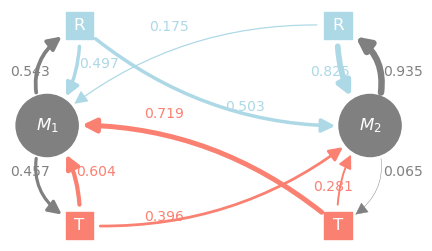

In [191]:
ftest = np.array([1, 0.001])

FSC_tofit.plot_FSC(features = ftest)

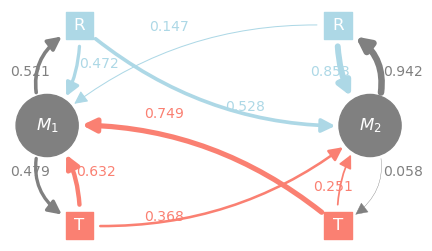

In [181]:
ftest = np.array([1, 0.1])

FSC_tofit.plot_FSC(features = ftest)

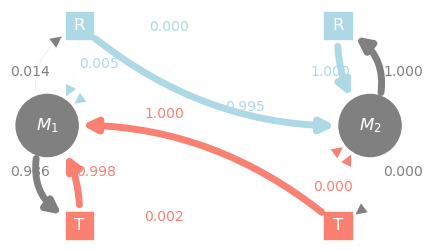

In [192]:
ftest = np.array([1, 5])

FSC_tofit.plot_FSC(features = ftest)

In [185]:
gt = FSC_tofit.generate_trajectories()

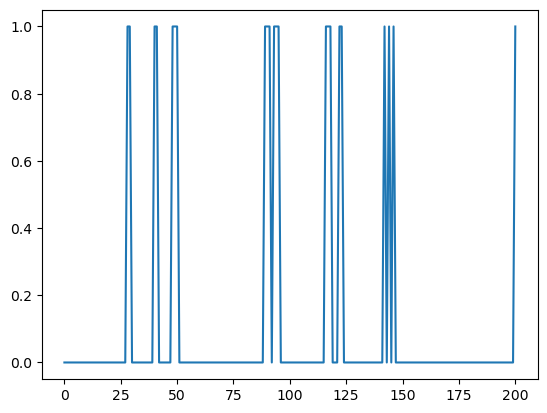

In [188]:
plt.plot(gt[0]["actions"])

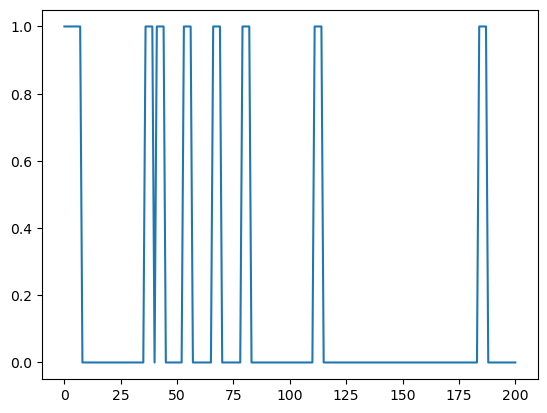

In [190]:
plt.plot(res[0]["actions"][::tau_sub])

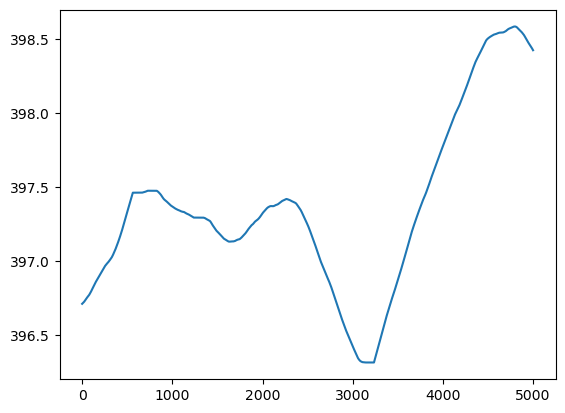

In [ ]:
trajectories = [{"features": torch.tensor(res["features"]), "targets": torch.tensor(res["targets"])}]

In [144]:
res[0]["actions"].shape

(5001,)

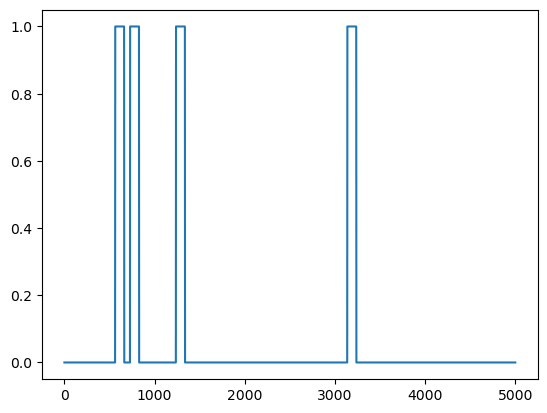

In [145]:
plt.plot(res[1]["actions"])

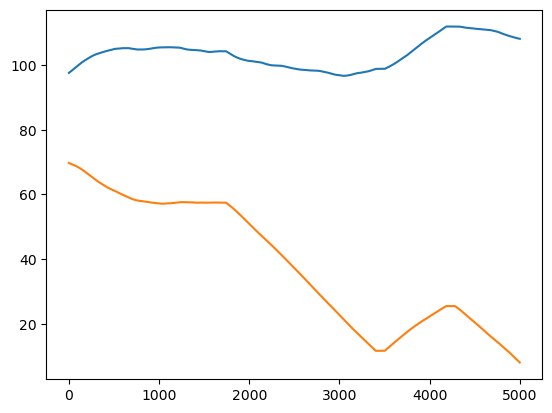

In [146]:
plt.plot(res[0]["pos_xyz"][0])
plt.plot(res[0]["pos_xyz"][1])